In [131]:
import pandas as pd
import os,sys, imp
sys.path.append('./src/')
import doc_utils_clean as doc_utils
import feature_utils
import defines
import numpy as np
from sklearn_crfsuite import scorers, CRF
from sklearn_crfsuite import metrics
from sklearn_crfsuite.metrics import flat_classification_report
from sklearn.model_selection import LeaveOneGroupOut,LeavePGroupsOut,GroupKFold

from operator import itemgetter
from sklearn_crfsuite.utils import flatten
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import random
import model_utils
import seaborn as sns
import matplotlib.pyplot as plt


In [65]:
imp.reload(doc_utils)
doc_utils.parse_all_docs()
doc_db =  pd.read_csv("./dataframes/doc_db.csv")
doc_db.sort_values(by='doc_idx_from_name',inplace=True)
doc_db

Creating doc_db
1 Doc 580 sentences saved
Finished doc 0 of 80
2 Doc 632 sentences saved
Finished doc 1 of 80
3 Doc 559 sentences saved
Finished doc 2 of 80
4 Doc 460 sentences saved
Finished doc 3 of 80
5 Doc 510 sentences saved
Finished doc 4 of 80
6 Doc 779 sentences saved
Finished doc 5 of 80
7 Doc 438 sentences saved
Finished doc 6 of 80
8 Doc 350 sentences saved
Finished doc 7 of 80
9 Doc 565 sentences saved
Finished doc 8 of 80
10 Doc 400 sentences saved
Finished doc 9 of 80
11 Doc 736 sentences saved
Finished doc 10 of 80
12 Doc 699 sentences saved
Finished doc 11 of 80
13 Doc 677 sentences saved
Finished doc 12 of 80
14 Doc 618 sentences saved
Finished doc 13 of 80
15 Doc 648 sentences saved
Finished doc 14 of 80
16 Doc 414 sentences saved
Finished doc 15 of 80
17 Doc 533 sentences saved
Finished doc 16 of 80
18 Doc 142 sentences saved
Finished doc 17 of 80
19 Doc 345 sentences saved
Finished doc 18 of 80
20 Doc 269 sentences saved
Finished doc 19 of 80
21 Doc 598 sentences sa

path              file_name  \
0   /path1   /path2   /path3   /path4   /path..                                                ...                    ...   
75  /path76  /path77  /path78  /path79  /path
    doc_idx_from_name  par_count  sent_count  nar_sent_count  
0                   1 205.000000  580.000000      256.000000  
1                   2 157.000000  632.000000       70.000000  
2                   3 118.000000  559.000000      102.000000  
3                   4 132.000000  460.000000      172.000000  
4                   5  65.000000  510.000000      270.000000  
..                ...        ...         ...             ...  
75                 76 132.000000  464.000000      164.000000  
76                 77 176.000000  406.000000       64.000000  
77                 78 122.000000  178.000000       44.000000  
78                 79 173.000000  252.000000       70.000000  
79                 80 225.000000  491.000000      102.000000  

[80 rows x 6 columns]

### Flow:
- Save doc names/statistic
- Parse doc
- Calculate POS
- Calculate vectors
- Calculate similarity
- Save docs' features
- Proceed paragraphs (split long)
- Pask features to dictionary per doc/ per paragraph


In [150]:
imp.reload(doc_utils)
imp.reload(defines)
imp.reload(feature_utils)
doc_utils.parse_all_docs()

ft = feature_utils.load_fasstex_model()

for doc_idx in doc_db['doc_idx_from_name'].values:  
    feature_utils.save_doc_features(int(doc_idx),ft)

Creating doc_db
1 Doc 497 sentences saved
Finished doc 0 of 80
2 Doc 298 sentences saved
Finished doc 1 of 80
3 Doc 463 sentences saved
Finished doc 2 of 80
4 Doc 652 sentences saved
Finished doc 3 of 80
5 Doc 598 sentences saved
Finished doc 4 of 80
6 Doc 162 sentences saved
Finished doc 5 of 80
7 Doc 438 sentences saved
Finished doc 6 of 80
8 Doc 385 sentences saved
Finished doc 7 of 80
9 Doc 204 sentences saved
Finished doc 8 of 80
10 Doc 468 sentences saved
Finished doc 9 of 80
11 Doc 209 sentences saved
Finished doc 10 of 80
12 Doc 736 sentences saved
Finished doc 11 of 80
13 Doc 339 sentences saved
Finished doc 12 of 80
14 Doc 571 sentences saved
Finished doc 13 of 80
15 Doc 251 sentences saved
Finished doc 14 of 80
16 Doc 355 sentences saved
Finished doc 15 of 80
17 Doc 170 sentences saved
Finished doc 16 of 80
18 Doc 456 sentences saved
Finished doc 17 of 80
19 Doc 699 sentences saved
Finished doc 18 of 80
20 Doc 898 sentences saved
Finished doc 19 of 80
21 Doc 426 sentences sa

40 doc sent saved
40 sim_db sent saved
41 sent lemma db saved
41 sent count db saved
41 sent features db saved
41 doc sent saved
41 sim_db sent saved
42 sent lemma db saved
42 sent count db saved
42 sent features db saved
42 doc sent saved
42 sim_db sent saved
43 sent lemma db saved
43 sent count db saved
43 sent features db saved
43 doc sent saved
43 sim_db sent saved
44 sent lemma db saved
44 sent count db saved
44 sent features db saved
44 doc sent saved
44 sim_db sent saved
45 sent lemma db saved
45 sent count db saved
45 sent features db saved
45 doc sent saved
45 sim_db sent saved
46 sent lemma db saved
46 sent count db saved
46 sent features db saved
46 doc sent saved
46 sim_db sent saved
47 sent lemma db saved
47 sent count db saved
47 sent features db saved
47 doc sent saved
47 sim_db sent saved
48 sent lemma db saved
48 sent count db saved
48 sent features db saved
48 doc sent saved
48 sim_db sent saved
49 sent lemma db saved
49 sent count db saved
49 sent features db saved
4

In [74]:
imp.reload(feature_utils)
docs_map = feature_utils.pack_all_doc_sentences_to_map(per_par=True,limit=0,sent_lemma_db_list=[])

4 doc 251 paragraphes packed
11 doc 99 paragraphes packed
30 doc 174 paragraphes packed
25 doc 146 paragraphes packed
58 doc 90 paragraphes packed
72 doc 158 paragraphes packed
67 doc 200 paragraphes packed
46 doc 141 paragraphes packed
53 doc 86 paragraphes packed
79 doc 148 paragraphes packed
40 doc 41 paragraphes packed
55 doc 136 paragraphes packed
74 doc 123 paragraphes packed
61 doc 338 paragraphes packed
9 doc 160 paragraphes packed
36 doc 89 paragraphes packed
23 doc 124 paragraphes packed
2 doc 206 paragraphes packed
17 doc 111 paragraphes packed
28 doc 172 paragraphes packed
80 doc 85 paragraphes packed
31 doc 89 paragraphes packed
24 doc 68 paragraphes packed
5 doc 95 paragraphes packed
10 doc 46 paragraphes packed
78 doc 53 paragraphes packed
47 doc 166 paragraphes packed
52 doc 110 paragraphes packed
73 doc 59 paragraphes packed
66 doc 82 paragraphes packed
59 doc 249 paragraphes packed
75 doc 218 paragraphes packed
60 doc 99 paragraphes packed
41 doc 114 paragraphes packe

In [76]:
docs_map[23]['X'][12]

[{'par_idx_in_doc': 12.0,
  'sent_len': 10.0,
  'is_client': 0,
  'sent_idx_in_par': 0,
  'TOKEN': 7,
  'POSTAG_CONJ': 0.2857142857142857,
  'POSTAG_IN': 0.1428571428571428,
  'POSTAG_NNT': 0.1428571428571428,
  'POSTAG_PREPOSITION': 0.1428571428571428,
  'POSTAG_RB': 0.5714285714285714,
  'POSTAG_S_PRN': 0.1428571428571428,
  'POSTAG_VB': 0.1428571428571428,
  'f_gen_F': 0.1428571428571428,
  'f_gen_M': 0.1428571428571428,
  'f_num_P': 0.1428571428571428,
  'f_num_S': 0.1428571428571428,
  'f_per_3': 0.1428571428571428,
  'tfidf_word_4968': 0.165866150262045,
  'tfidf_word_4469': 0.6213653717663224,
  'tfidf_word_2377': 0.2965181490203456,
  'tfidf_word_1714': 0.48917002717023766,
  'tfidf_word_422': 0.4539338196524986,
  'tfidf_word_405': 0.23049350134539281,
  'tfidf_char_wb_22616': 0.2695941766838068,
  'tfidf_char_wb_22615': 0.24754200735544454,
  'tfidf_char_wb_22613': 0.18356990498054265,
  'tfidf_char_wb_21906': 0.10134034894274299,
  'tfidf_char_wb_21859': 0.19115250594489697,

### Smart paragraph pack

### Run single example - sequence = 3x paragraph [1:3][4:6]...

In [77]:
imp.reload(feature_utils)
feature_utils.reshape_docs_map_to_seq(docs_map,3,3)

doc paragraphs reshaped: from 251 to 84
doc paragraphs reshaped: from 99 to 33
doc paragraphs reshaped: from 174 to 58
doc paragraphs reshaped: from 146 to 49
doc paragraphs reshaped: from 90 to 30
doc paragraphs reshaped: from 158 to 53
doc paragraphs reshaped: from 200 to 67
doc paragraphs reshaped: from 141 to 47
doc paragraphs reshaped: from 86 to 29
doc paragraphs reshaped: from 148 to 50
doc paragraphs reshaped: from 41 to 14
doc paragraphs reshaped: from 136 to 46
doc paragraphs reshaped: from 123 to 41
doc paragraphs reshaped: from 338 to 113
doc paragraphs reshaped: from 160 to 54
doc paragraphs reshaped: from 89 to 30
doc paragraphs reshaped: from 124 to 42
doc paragraphs reshaped: from 206 to 69
doc paragraphs reshaped: from 111 to 37
doc paragraphs reshaped: from 172 to 58
doc paragraphs reshaped: from 85 to 29
doc paragraphs reshaped: from 89 to 30
doc paragraphs reshaped: from 68 to 23
doc paragraphs reshaped: from 95 to 32
doc paragraphs reshaped: from 46 to 16
doc parag

In [78]:
docs_map[1].keys()

dict_keys(['X', 'y', 'groups', 'X_shaped', 'y_shaped', 'groups_shpaped'])

In [79]:
# import random

def get_test_train_idx(docs_map,test_percent):
    doc_indices = set(docs_map.keys())
    doc_count = len(docs_map.keys())
    test_count = int(test_percent*doc_count)
    test_idx = set(random.sample(doc_indices, test_count))
    train_idx = doc_indices - test_idx
#     print("train {}\ntest {}".format(train_idx,test_idx))
    return train_idx,test_idx

def split_test_train_docs(docs_map,test_percent):
    train_idx,test_idx = get_test_train_idx(docs_map,0.25)
    X_train = []
    y_train = []
    X_test = []
    y_test = []
    groups_train = []
    groups_test = []
    for idx in train_idx:
        X_train.extend(docs_map[idx]['X_shaped'])
        y_train.extend(docs_map[idx]['y_shaped'])
        groups_train.extend([idx for i in range(len(docs_map[idx]['y_shaped']))])
    for idx in test_idx:
        X_test.extend(docs_map[idx]['X_shaped'])
        y_test.extend(docs_map[idx]['y_shaped'])
        groups_test.extend([idx for i in range (len(docs_map[idx]['y_shaped']))])
    return X_train,y_train,X_test,y_test,test_idx,groups_train,groups_test

# get_test_train_idx(docs_map,0.25)

In [80]:
test_percent = 0.25
X_train,y_train,X_test,y_test,test_idx,groups_train,groups_test =  split_test_train_docs(docs_map,test_percent)

In [81]:
len(y_train),len(y_test)

(2829, 856)

### Cross-validate

In [142]:
def manual_groups_validate(docs_map,test_percent,num_splits=10):
    score_list = []
    for i in range(num_splits):
        X_train,y_train,X_test,y_test,test_idx,groups_train,groups_test =  split_test_train_docs(docs_map,test_percent)
        score_list.append(manual_get_prediction(X_train,y_train,X_test,y_test))
    return np.array(score_list)

def manual_get_prediction(X_train,y_train,X_test,y_test):
    crf = CRF(
    min_freq = 5,
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=100,
    all_possible_transitions=True,
    )
    crf.fit(X_train, y_train)
    y_pred  =  crf.predict(X_test)
    labels = list(crf.classes_)
    f1 = metrics.flat_f1_score(y_test, y_pred,average='weighted', labels=labels)
    recall = metrics.flat_recall_score(y_test, y_pred,average='weighted', labels=labels)
    precision = metrics.flat_precision_score(y_test, y_pred,average='weighted', labels=labels)
    return [f1,recall,precision]

In [143]:
score_db_man = pd.DataFrame()
score =  manual_groups_validate(docs_map,test_percent,num_splits=10)
feature_utils.add_score_to_db(score_db_man,"3_3_man",score)

mean_values [0.68559871 0.69356052 0.68402819]


,f1,recall,precision
3_3_man,0.685599,0.693561,0.684028


In [147]:
X_test[4]

[{'par_idx_in_doc': 14.0,
  'sent_len': 75.0,
  'is_client': 1,
  'sent_idx_in_par': 0,
  'TOKEN': 2,
  'POSTAG_INTJ': 0.5,
  'POSTAG_NN': 0.5,
  'POSTAG_PREPOSITION': 0.5,
  'f_gen_M': 0.5,
  'f_num_S': 0.5,
  'tfidf_word_7546': 0.9220063273813431,
  'tfidf_word_239': 0.38717480841186896,
  'tfidf_char_wb_27463': 0.29628537408205863,
  'tfidf_char_wb_27462': 0.2954196986088325,
  'tfidf_char_wb_27460': 0.2509622640519441,
  'tfidf_char_wb_24939': 0.36067409835989406,
  'tfidf_char_wb_24938': 0.3483275911011752,
  'tfidf_char_wb_24932': 0.2636616383810202,
  'tfidf_char_wb_21906': 0.15458357901670358,
  'tfidf_char_wb_16334': 0.22931734909375948,
  'tfidf_char_wb_16333': 0.21600921753534083,
  'tfidf_char_wb_8923': 0.13930511945532387,
  'tfidf_char_wb_5852': 0.3483275911011752,
  'tfidf_char_wb_5850': 0.29806716004492384,
  'tfidf_char_wb_5840': 0.20098400960513313,
  'tfidf_char_wb_172': 0.15753065709444397,
  'tfidf_char_wb_171': 0.15195293604322826},
 {'par_idx_in_doc': 16.0,
  'se

In [82]:
from sklearn.model_selection import LeaveOneGroupOut
crf = CRF(
    min_freq = 5,
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=100,
    all_possible_transitions=True,
    )
# group_indices = set(groups_shaped)
# n_groups = len(group_indices)
# test_percent = 0.33
# n_out = int(n_groups*test_percent)
# # n_splits = int(n_groups/n_out)
# n_splits=40
# # logo = GroupKFold(n_splits=n_splits)
# logo = LeaveOneGroupOut()
# print("Split num: {}".format(logo.get_n_splits(X_shaped,y_shaped,groups_shaped)))
# split = logo.split(X_shaped, y_shaped, groups_shaped)
# itteration = 0
# for train_idx, test_idx in split:
#     if(itteration > 1):
#         break
#     itteration +=1
#     print("itteration {}".format(itteration))
# print("Train num: {}\nTest num: {}".format(len(train_idx),len(test_idx)))
# X_train = itemgetter(*train_idx)(X_shaped)
# y_train  = itemgetter(*train_idx)(y_shaped)
# X_test = itemgetter(*test_idx)(X_shaped)
# y_test = itemgetter(*test_idx)(y_shaped)

In [83]:
crf.fit(X_train, y_train)
y_pred  =  crf.predict(X_test)
labels = list(crf.classes_)
f1 = metrics.flat_f1_score(y_test, y_pred,average='weighted', labels=labels)
recall = metrics.flat_recall_score(y_test, y_pred,average='weighted', labels=labels)
precision = metrics.flat_precision_score(y_test, y_pred,average='weighted', labels=labels)
print ("f1 {}\nrecall {}\nprecition {}".format(f1,recall,precision))

f1 0.658795136678438
recall 0.6618263956114876
precition 0.6563936228652792


### Error analysis

In [84]:
len(y_pred)

856

In [85]:
len(y_pred[0])

3

In [86]:
def flatten_sequence(samples,pred_df):
    for i,sample in enumerate(samples):
        for j,seq_item in enumerate(sample):
            idx = pred_df.shape[0]
            pred_df.loc[idx,'test_idx'] = i
    y_pred_flat = flatten(samples)
    return y_pred_flat,pred_df

pred_df = pd.DataFrame()
a,b=flatten_sequence(y_pred,pred_df)

In [87]:
y_pred_proba = crf.predict_marginals(X_test)
y_pred_proba[0]

[{'False': 0.7356214584333408, 'True': 0.26437854156665924},
 {'False': 0.742580606083977, 'True': 0.25741939391602314},
 {'False': 0.733699518155199, 'True': 0.2663004818448012}]

              precision    recall  f1-score   support

       False       0.74      0.76      0.75      4136
        True       0.49      0.46      0.47      2062

    accuracy                           0.66      6198
   macro avg       0.61      0.61      0.61      6198
weighted avg       0.66      0.66      0.66      6198



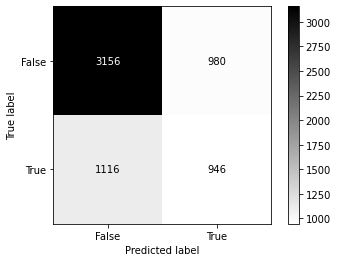

In [88]:
feature_utils.get_prediction_report(flatten(y_test),flatten(y_pred),labels)

In [113]:
# import model_utils
imp.reload(model_utils)
conf_threshold = 0.9
err_df,corr_df = model_utils.error_analisys(y_pred,y_pred_proba,y_test,groups_test)
err_df

,seq_idx,idx_in_seq,doc_idx,seq_len,label,pred,pred_proba
0,67.000000,23.000000,11.000000,32.000000,False,True,0.999167
1,67.000000,24.000000,11.000000,32.000000,False,True,0.998895
2,847.000000,6.000000,73.000000,59.000000,True,False,0.998707
3,852.000000,7.000000,73.000000,21.000000,True,False,0.998535
4,847.000000,5.000000,73.000000,59.000000,True,False,0.998316
...,...,...,...,...,...,...,...
2091,741.000000,1.000000,66.000000,8.000000,False,True,0.500768
2092,409.000000,5.000000,51.000000,7.000000,True,False,0.500735
2093,697.000000,7.000000,63.000000,12.000000,False,True,0.500447
2094,226.000000,5.000000,25.000000,11.000000,True,False,0.500253


In [114]:
strong_err = err_df.query("pred_proba > @conf_threshold")
strong_err

,seq_idx,idx_in_seq,doc_idx,seq_len,label,pred,pred_proba
0,67.000000,23.000000,11.000000,32.000000,False,True,0.999167
1,67.000000,24.000000,11.000000,32.000000,False,True,0.998895
2,847.000000,6.000000,73.000000,59.000000,True,False,0.998707
3,852.000000,7.000000,73.000000,21.000000,True,False,0.998535
4,847.000000,5.000000,73.000000,59.000000,True,False,0.998316
...,...,...,...,...,...,...,...
643,346.000000,0.000000,41.000000,4.000000,True,False,0.900929
644,169.000000,5.000000,20.000000,8.000000,True,False,0.900848
645,303.000000,0.000000,40.000000,6.000000,True,False,0.900628
646,173.000000,6.000000,20.000000,8.000000,True,False,0.900525


In [115]:
strong_corr = corr_df.query("pred_proba > @conf_threshold")
strong_corr

,seq_idx,idx_in_seq,doc_idx,seq_len,label,pred,pred_proba
0,35.000000,4.000000,8.000000,16.000000,False,False,0.998786
1,35.000000,5.000000,8.000000,16.000000,False,False,0.998298
2,35.000000,2.000000,8.000000,16.000000,False,False,0.998266
3,395.000000,49.000000,44.000000,69.000000,True,True,0.998262
4,849.000000,18.000000,73.000000,57.000000,False,False,0.998237
...,...,...,...,...,...,...,...
1524,557.000000,1.000000,54.000000,8.000000,False,False,0.900426
1525,204.000000,0.000000,24.000000,23.000000,False,False,0.900300
1526,271.000000,4.000000,38.000000,8.000000,False,False,0.900150
1527,243.000000,2.000000,25.000000,5.000000,False,False,0.900124


In [116]:
error_sent = X_test[int(err_df.loc[0,'seq_idx'])][int(err_df.loc[0,'idx_in_seq'])]
list(error_sent.keys())[:5]

['par_idx_in_doc', 'sent_len', 'is_client', 'sent_idx_in_par', 'TOKEN']

In [117]:
strong_err['doc_idx'].unique()

array([11., 73., 20.,  6., 24.,  8., 41., 51., 25., 67., 58., 38., 54.,
       63., 15., 53., 44., 66., 40.])

In [118]:
strong_corr['doc_idx'].unique()

array([ 8., 44., 73., 53., 24., 40., 63., 38., 25., 66., 59., 54., 58.,
       51., 11., 15., 20., 67.,  6., 41.])

In [119]:
strong_err.groupby("doc_idx")

In [120]:
def retrive_predicted_sent(pred_df,groups_test,X_test):
    pred_sent_db = pd.DataFrame()
    test_docs = pred_df['doc_idx'].unique()
    for doc_idx in test_docs[:1]:
        doc_samples = pred_df.query("doc_idx == @doc_idx")
        display(doc_samples)
        sent_db =  pd.read_csv(r"./dataframes/{:02d}_sent_db.csv".format(int(doc_idx)))
        for index,row in doc_samples.iterrows():
            print("index {} row [{}][{}]".format(index,row['seq_idx'],row['idx_in_seq']))
            err_sent = X_test[int(row['seq_idx'])][int(row['idx_in_seq'])]
            for i in list (err_sent.keys())[:5]:
                print("{}: {}".format(i,err_sent[i]))
            sent_info = sent_db.query("par_idx_in_doc == @err_sent['par_idx_in_doc'] & sent_idx_in_par == @err_sent['sent_idx_in_par']")
            display(sent_info)
            row['sent_idx'] = sent_info.index.values[0]
             
            pred_sent_db =  pred_sent_db.append(sent_info)
            if index > 1:
                break
    return pred_sent_db
pred_sent_db = retrive_predicted_sent(strong_err,groups_test,X_test)            
pred_sent_db
    

,seq_idx,idx_in_seq,doc_idx,seq_len,label,pred,pred_proba
0,67.000000,23.000000,11.000000,32.000000,False,True,0.999167
1,67.000000,24.000000,11.000000,32.000000,False,True,0.998895
10,67.000000,15.000000,11.000000,32.000000,False,True,0.997620
16,67.000000,22.000000,11.000000,32.000000,False,True,0.997377
17,67.000000,14.000000,11.000000,32.000000,False,True,0.997345
18,67.000000,20.000000,11.000000,32.000000,False,True,0.997105
19,67.000000,21.000000,11.000000,32.000000,False,True,0.997098
22,67.000000,16.000000,11.000000,32.000000,False,True,0.996855
27,67.000000,11.000000,11.000000,32.000000,False,True,0.996048
36,67.000000,12.000000,11.000000,32.000000,False,True,0.995495


index 0 row [67.0][23.0]
par_idx_in_doc: 67.0
sent_len: 918.0
is_client: 1
sent_idx_in_par: 21
TOKEN: 4


,is_question,text,sent_idx_in_block,block_idx,is_nar,doc_idx,par_db_idx,par_idx_in_doc,par_type,block_type,nar_idx,sent_len,is_client,sent_idx_in_par
345,0.000000,אני אעדיף לשחק אותה שאני לא יודע וש,21.000000,72.000000,0.000000,11.000000,67.000000,67.000000,client,not_nar,0.000000,35.000000,1,21


index 1 row [67.0][24.0]
par_idx_in_doc: 67.0
sent_len: 47.0
is_client: 1
sent_idx_in_par: 22
TOKEN: 7


,is_question,text,sent_idx_in_block,block_idx,is_nar,doc_idx,par_db_idx,par_idx_in_doc,par_type,block_type,nar_idx,sent_len,is_client,sent_idx_in_par
346,0.000000,תרצה תגיד לי לא תרצה לא תגיד לי,22.000000,72.000000,0.000000,11.000000,67.000000,67.000000,client,not_nar,0.000000,31.000000,1,22


index 10 row [67.0][15.0]
par_idx_in_doc: 67.0
sent_len: 211.0
is_client: 1
sent_idx_in_par: 13
TOKEN: 4


,is_question,text,sent_idx_in_block,block_idx,is_nar,doc_idx,par_db_idx,par_idx_in_doc,par_type,block_type,nar_idx,sent_len,is_client,sent_idx_in_par
337,0.000000,הסתובבה שמועה שמישהי עוזבת לחול אז דיברתי על ז...,13.000000,72.000000,0.000000,11.000000,67.000000,67.000000,client,not_nar,0.000000,97.000000,1,13


,is_question,text,sent_idx_in_block,block_idx,is_nar,doc_idx,par_db_idx,par_idx_in_doc,par_type,block_type,nar_idx,sent_len,is_client,sent_idx_in_par
345,0.000000,אני אעדיף לשחק אותה שאני לא יודע וש,21.000000,72.000000,0.000000,11.000000,67.000000,67.000000,client,not_nar,0.000000,35.000000,1,21
346,0.000000,תרצה תגיד לי לא תרצה לא תגיד לי,22.000000,72.000000,0.000000,11.000000,67.000000,67.000000,client,not_nar,0.000000,31.000000,1,22
337,0.000000,הסתובבה שמועה שמישהי עוזבת לחול אז דיברתי על ז...,13.000000,72.000000,0.000000,11.000000,67.000000,67.000000,client,not_nar,0.000000,97.000000,1,13


In [121]:
error_features_df = pd.DataFrame()
keys = ['sent_len','is_client','sent_idx_in_par','par_idx_in_doc','TOKEN']
def add_sent_info(_pred_df):
    pred_df = _pred_df.copy()
    for idx,row in _pred_df.iterrows():
        err_sent = X_test[int(row['seq_idx'])][int(row['idx_in_seq'])]
        for key in keys:
            pred_df.loc[idx,key] =  err_sent[key]
    return pred_df

info_strong_err = add_sent_info(strong_err)
info_strong_err

,seq_idx,idx_in_seq,doc_idx,seq_len,label,pred,pred_proba,sent_len,is_client,sent_idx_in_par,par_idx_in_doc,TOKEN
0,67.000000,23.000000,11.000000,32.000000,False,True,0.999167,918.000000,1.000000,21.000000,67.000000,4.000000
1,67.000000,24.000000,11.000000,32.000000,False,True,0.998895,47.000000,1.000000,22.000000,67.000000,7.000000
2,847.000000,6.000000,73.000000,59.000000,True,False,0.998707,65.000000,0.000000,6.000000,35.000000,6.000000
3,852.000000,7.000000,73.000000,21.000000,True,False,0.998535,27.000000,0.000000,6.000000,51.000000,18.000000
4,847.000000,5.000000,73.000000,59.000000,True,False,0.998316,17.000000,0.000000,5.000000,35.000000,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
643,346.000000,0.000000,41.000000,4.000000,True,False,0.900929,41.000000,1.000000,0.000000,91.000000,11.000000
644,169.000000,5.000000,20.000000,8.000000,True,False,0.900848,25.000000,1.000000,0.000000,93.000000,14.000000
645,303.000000,0.000000,40.000000,6.000000,True,False,0.900628,28.000000,0.000000,0.000000,3.000000,4.000000
646,173.000000,6.000000,20.000000,8.000000,True,False,0.900525,41.000000,1.000000,4.000000,105.000000,10.000000


In [122]:
info_strong_corr = add_sent_info(strong_corr)
info_strong_corr

,seq_idx,idx_in_seq,doc_idx,seq_len,label,pred,pred_proba,sent_len,is_client,sent_idx_in_par,par_idx_in_doc,TOKEN
0,35.000000,4.000000,8.000000,16.000000,False,False,0.998786,25.000000,0.000000,4.000000,15.000000,12.000000
1,35.000000,5.000000,8.000000,16.000000,False,False,0.998298,47.000000,0.000000,5.000000,15.000000,14.000000
2,35.000000,2.000000,8.000000,16.000000,False,False,0.998266,80.000000,0.000000,2.000000,15.000000,16.000000
3,395.000000,49.000000,44.000000,69.000000,True,True,0.998262,27.000000,1.000000,44.000000,125.000000,3.000000
4,849.000000,18.000000,73.000000,57.000000,False,False,0.998237,14.000000,1.000000,0.000000,42.000000,28.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1524,557.000000,1.000000,54.000000,8.000000,False,False,0.900426,25.000000,1.000000,1.000000,273.000000,12.000000
1525,204.000000,0.000000,24.000000,23.000000,False,False,0.900300,86.000000,1.000000,0.000000,36.000000,7.000000
1526,271.000000,4.000000,38.000000,8.000000,False,False,0.900150,7.000000,0.000000,0.000000,22.000000,17.000000
1527,243.000000,2.000000,25.000000,5.000000,False,False,0.900124,74.000000,1.000000,1.000000,85.000000,16.000000


In [123]:
compare_df = pd.concat([info_strong_err,info_strong_corr],keys=['error','correct'])
compare_df.reset_index(inplace=True)
compare_df.rename(columns={'level_0':'prediction'},inplace=True)
compare_df

,prediction,level_1,seq_idx,idx_in_seq,doc_idx,seq_len,label,pred,pred_proba,sent_len,is_client,sent_idx_in_par,par_idx_in_doc,TOKEN
0,error,0,67.000000,23.000000,11.000000,32.000000,False,True,0.999167,918.000000,1.000000,21.000000,67.000000,4.000000
1,error,1,67.000000,24.000000,11.000000,32.000000,False,True,0.998895,47.000000,1.000000,22.000000,67.000000,7.000000
2,error,2,847.000000,6.000000,73.000000,59.000000,True,False,0.998707,65.000000,0.000000,6.000000,35.000000,6.000000
3,error,3,852.000000,7.000000,73.000000,21.000000,True,False,0.998535,27.000000,0.000000,6.000000,51.000000,18.000000
4,error,4,847.000000,5.000000,73.000000,59.000000,True,False,0.998316,17.000000,0.000000,5.000000,35.000000,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2172,correct,1524,557.000000,1.000000,54.000000,8.000000,False,False,0.900426,25.000000,1.000000,1.000000,273.000000,12.000000
2173,correct,1525,204.000000,0.000000,24.000000,23.000000,False,False,0.900300,86.000000,1.000000,0.000000,36.000000,7.000000
2174,correct,1526,271.000000,4.000000,38.000000,8.000000,False,False,0.900150,7.000000,0.000000,0.000000,22.000000,17.000000
2175,correct,1527,243.000000,2.000000,25.000000,5.000000,False,False,0.900124,74.000000,1.000000,1.000000,85.000000,16.000000


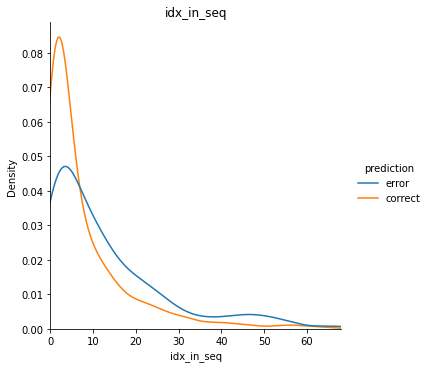

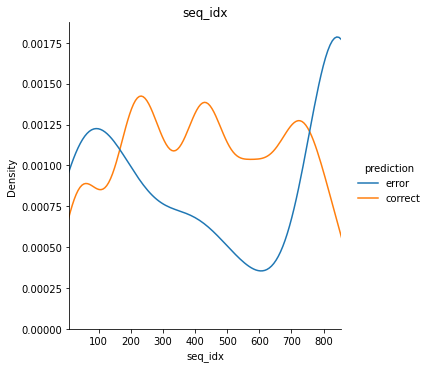

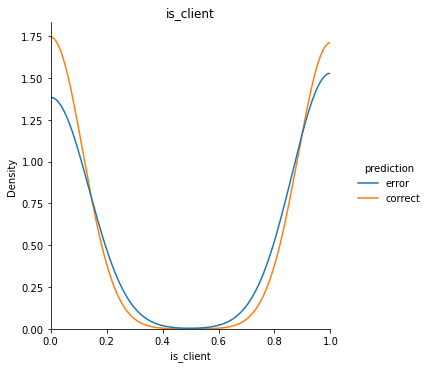

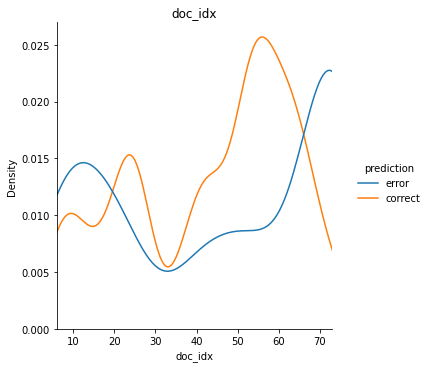

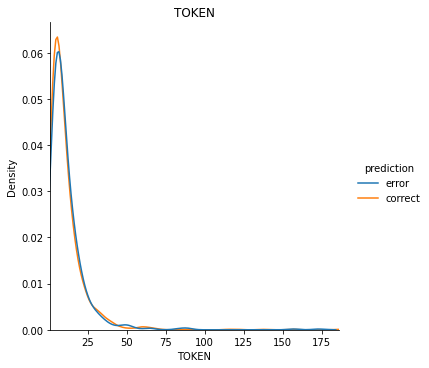

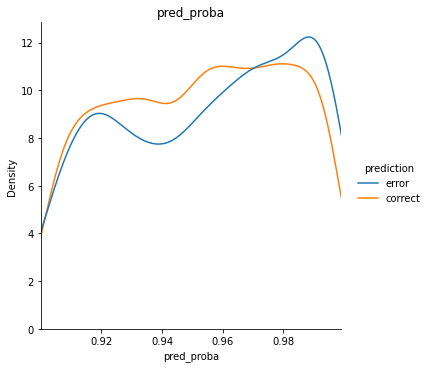

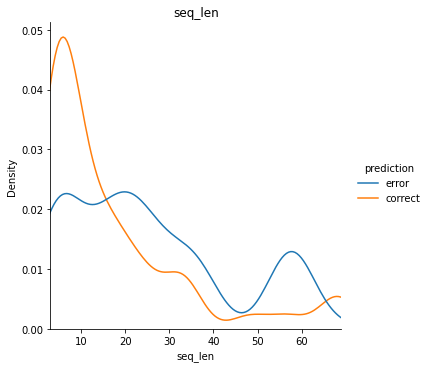

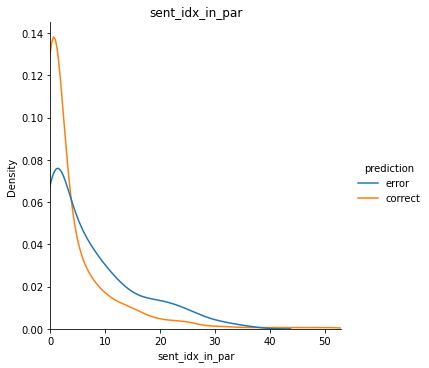

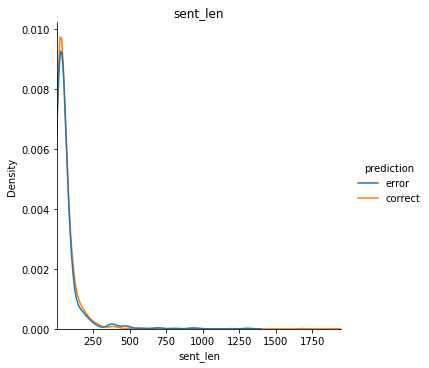

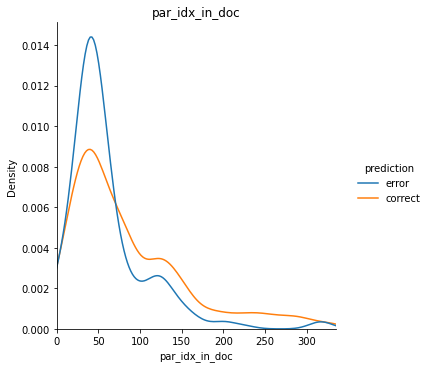

In [139]:
all_columns = set(compare_df.columns)
exclude_columns  = set(['label','pred','prediction','level_1'])
include_columns = all_columns-exclude_columns


for i,col in enumerate(include_columns):
    plot =  sns.displot(data=compare_df,
                        x=col,
                        kind='kde',
                       hue = 'prediction',
                        common_norm=False
                       )
    plot.set(xlim=(compare_df[col].min(),compare_df[col].max()),title=col)

In [148]:
docs_map_sent = feature_utils.pack_all_doc_sentences_to_map(per_par=False,limit=0,sent_lemma_db_list=[])

4 doc 460 sentences packed
11 doc 209 sentences packed
30 doc 356 sentences packed
25 doc 355 sentences packed
58 doc 269 sentences packed
72 doc 501 sentences packed
67 doc 264 sentences packed
46 doc 264 sentences packed
53 doc 369 sentences packed
79 doc 221 sentences packed
40 doc 221 sentences packed
55 doc 199 sentences packed
74 doc 400 sentences packed
61 doc 533 sentences packed
9 doc 204 sentences packed
36 doc 158 sentences packed
23 doc 294 sentences packed
2 doc 298 sentences packed
17 doc 170 sentences packed
28 doc 252 sentences packed
80 doc 395 sentences packed
31 doc 336 sentences packed
24 doc 317 sentences packed
5 doc 510 sentences packed
10 doc 400 sentences packed
78 doc 178 sentences packed
47 doc 204 sentences packed
52 doc 571 sentences packed
73 doc 395 sentences packed
66 doc 356 sentences packed
59 doc 344 sentences packed
75 doc 317 sentences packed
60 doc 170 sentences packed
41 doc 208 sentences packed
54 doc 505 sentences packed
29 doc 497 sentences pac

In [157]:
imp.reload(feature_utils)
feature_utils.reshape_docs_map_to_seq(docs_map_sent,per_par=False,seq_len=8,step=8)

doc sentences reshaped: from 460 to 58
doc sentences reshaped: from 209 to 27
doc sentences reshaped: from 356 to 45
doc sentences reshaped: from 355 to 45
doc sentences reshaped: from 269 to 34
doc sentences reshaped: from 501 to 63
doc sentences reshaped: from 264 to 33
doc sentences reshaped: from 264 to 33
doc sentences reshaped: from 369 to 47
doc sentences reshaped: from 221 to 28
doc sentences reshaped: from 221 to 28
doc sentences reshaped: from 199 to 25
doc sentences reshaped: from 400 to 50
doc sentences reshaped: from 533 to 67
doc sentences reshaped: from 204 to 26
doc sentences reshaped: from 158 to 20
doc sentences reshaped: from 294 to 37
doc sentences reshaped: from 298 to 38
doc sentences reshaped: from 170 to 22
doc sentences reshaped: from 252 to 32
doc sentences reshaped: from 395 to 50
doc sentences reshaped: from 336 to 42
doc sentences reshaped: from 317 to 40
doc sentences reshaped: from 510 to 64
doc sentences reshaped: from 400 to 50
doc sentences reshaped: f

In [158]:
test_percent = 0.25
X_train,y_train,X_test,y_test,test_idx,groups_train,groups_test =  split_test_train_docs(docs_map_sent,test_percent)

In [159]:
X_test[3]

[{'par_idx_in_doc': 12.0,
  'sent_len': 73.0,
  'is_client': 1,
  'sent_idx_in_par': 9,
  'TOKEN': 14,
  'POSTAG_DEF': 0.3571428571428571,
  'POSTAG_DTT': 0.0714285714285714,
  'POSTAG_EX': 0.0714285714285714,
  'POSTAG_JJ': 0.0714285714285714,
  'POSTAG_NN': 0.3571428571428571,
  'POSTAG_PREPOSITION': 0.2142857142857142,
  'POSTAG_PRP': 0.0714285714285714,
  'POSTAG_RB': 0.2857142857142857,
  'POSTAG_VB': 0.0714285714285714,
  'f_gen_M': 0.5714285714285714,
  'f_num_P': 0.0714285714285714,
  'f_num_S': 0.5,
  'f_per_3': 0.1428571428571428,
  'f_tense_PAST': 0.0714285714285714,
  '-1:par_idx_in_doc': 12.0,
  '-1:sent_len': 23.0,
  '-1:is_client': 1,
  '-1:sent_idx_in_par': 8,
  '-1:TOKEN': 17,
  '-1:POSTAG_AT': 0.1764705882352941,
  '-1:POSTAG_BN': 0.0588235294117647,
  '-1:POSTAG_CONJ': 0.0588235294117647,
  '-1:POSTAG_COP': 0.0588235294117647,
  '-1:POSTAG_DEF': 0.2352941176470588,
  '-1:POSTAG_DTT': 0.1176470588235294,
  '-1:POSTAG_IN': 0.0588235294117647,
  '-1:POSTAG_MD': 0.058823

In [161]:
crf = CRF(
    min_freq = 5,
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=100,
    all_possible_transitions=True,
    )
crf.fit(X_train, y_train)
y_pred  =  crf.predict(X_test)
labels = list(crf.classes_)
f1 = metrics.flat_f1_score(y_test, y_pred,average='weighted', labels=labels)
recall = metrics.flat_recall_score(y_test, y_pred,average='weighted', labels=labels)
precision = metrics.flat_precision_score(y_test, y_pred,average='weighted', labels=labels)
print ("f1 {}\nrecall {}\nprecition {}".format(f1,recall,precision))

f1 0.6729220706295359
recall 0.6831739688882547
precition 0.6739692164055393


In [162]:
score =  manual_groups_validate(docs_map_sent,test_percent,num_splits=10)
feature_utils.add_score_to_db(score_db_man,"3_3_man_sent",score)

mean_values [0.66178622 0.67936115 0.65885534]


,f1,recall,precision
3_3_man,0.685599,0.693561,0.684028
3_3_man_sent,0.661786,0.679361,0.658855


In [ ]:
score_db_man

In [72]:
mer_db =   pd.read_csv(r"./dataframes/{:02d}_merged_db.csv".format(int(groups_test[0])))
mer_db.head()

,is_nar,par_idx_in_doc,sent_len,is_client,sent_idx_in_par,TOKEN,POSTAG_ADVERB,POSTAG_AT,POSTAG_BN,POSTAG_BNT,...,f_suf_per_2.0,f_suf_per_3.0,f_per_1,f_per_2,f_per_3,f_per_A,f_tense_BEINONI,f_tense_FUTURE,f_tense_IMPERATIVE,f_tense_PAST
0,0.000000,0.000000,14.000000,1,0,1,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
1,0.000000,1.000000,5.000000,0,0,2,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,2.000000,22.000000,1,0,2,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,4.000000,22.000000,1,0,1,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,6.000000,9.000000,1,0,3,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.333333,0.000000,0.000000


In [67]:
for i,row in enumerate(X_test):
    for j,item in enumerate(row):
        if not 'is_client' in item:
            print("No client tag in X_test[{}][{}]".format(i,j))


No client tag in X_test[0][1]
No client tag in X_test[1][2]
No client tag in X_test[2][1]
No client tag in X_test[3][0]
No client tag in X_test[4][3]
No client tag in X_test[5][1]
No client tag in X_test[6][0]
No client tag in X_test[8][3]
No client tag in X_test[9][0]
No client tag in X_test[10][1]
No client tag in X_test[11][0]
No client tag in X_test[12][2]
No client tag in X_test[13][3]
No client tag in X_test[14][0]
No client tag in X_test[15][1]
No client tag in X_test[16][0]
No client tag in X_test[17][1]
No client tag in X_test[18][2]
No client tag in X_test[19][0]
No client tag in X_test[20][2]
No client tag in X_test[21][0]
No client tag in X_test[22][3]
No client tag in X_test[23][0]
No client tag in X_test[24][1]
No client tag in X_test[25][0]
No client tag in X_test[26][0]
No client tag in X_test[27][4]
No client tag in X_test[29][3]
No client tag in X_test[30][1]
No client tag in X_test[31][0]
No client tag in X_test[32][1]
No client tag in X_test[33][0]
No client tag in 

In [38]:
for index,row in pred_sent_db.iterrows():
    display(row.transpose())
    break


is_question                                                   0.000000
text                 ההכאה שחזרתי אליו זאת אומרת מה שעשיתי זה מה שה...
sent_idx_in_block                                             1.000000
block_idx                                                   225.000000
is_nar                                                        1.000000
doc_idx                                                      14.000000
par_db_idx                                                  214.000000
par_idx_in_doc                                              214.000000
par_type                                                        client
block_type                                                      middle
nar_idx                                                      10.000000
sent_len                                                     70.000000
is_client                                                            1
sent_idx_in_par                                                      1
Name: 

In [286]:
len(groups_test), len(y_test)

(1416, 1416)

# TODO
[] retrive all strong wrong  / strong correct sentences
[] check the difference

In [287]:
groups_test[int(err_df.loc[0,'seq_idx'])]

73

In [291]:
test_doc_idx = groups_test[int(err_df.loc[0,'seq_idx'])]
print ("Test doc idx = {}".format(test_doc_idx))
sent_db =  pd.read_csv(r"./dataframes/{:02d}_sent_db.csv".format(test_doc_idx))

Test doc idx = 73


In [293]:
sent_db.query("par_idx_in_doc == @error_sent['par_idx_in_doc'] and sent_idx_in_par == @error_sent['sent_idx_in_par']")

,is_question,text,sent_idx_in_block,block_idx,is_nar,doc_idx,par_db_idx,par_idx_in_doc,par_type,block_type,nar_idx,sent_len,is_client,sent_idx_in_par
233,0.000000,אני כן חושב שחברה,14.000000,49.000000,1.000000,73.000000,43.000000,43.000000,therapist,start,6.000000,17.000000,0,15


In [239]:
test_idx

{1, 2, 5, 6, 11, 16, 22, 26, 37, 41, 49, 50, 55, 56, 57, 59, 63, 67, 69, 75}

In [222]:
len(y_pred),len(flatten(y_pred))

(1551, 10194)

In [219]:
len(X_test)

1551

### Cross-validate

In [97]:
score_db = pd.DataFrame()

In [111]:
imp.reload(feature_utils)
shapes = [(3,3), # sequence [1:3][4:6]...
          (3,2), # sequence [1:3][3:7]...
          (3,1)] # sequence [1:3][2:4][3:5]...
n_groups = 80 # len(set(groups_plane))
test_percent = 0.40
norm = 1
normed = "norm" if norm else ""
prefix = "no_limit"
n_splits = int(n_groups*test_percent)
n_out = int(n_groups/n_splits)
if n_out == 1:
    logo = LeaveOneGroupOut()
else:
#     logo = LeavePGroupsOut(n_groups=num_out)
    logo = GroupKFold(n_splits=n_splits)
#     print(logo.get_n_splits(X_plane,y_plane,groups_plane))

for shape in shapes[1:2]:
    seq_len = shape[0]
    step = shape[1]
#     X_shaped,y_shaped,groups_shaped = feature_utils.reshape_doc_paragraphs_to_sequence(X_plane,y_plane,groups_plane,seq_len,step)
#     X_shaped,y_shaped,groups_shaped = feature_utils.reshape_docs_map_to_seq(docs_map,seq_len,step)
    score = feature_utils.leave_out_validate(X_shaped,y_shaped,groups_shaped,logo)
    feature_utils.add_score_to_db(score_db,"{}_len{}_step{}_{}".format(prefix,seq_len,step,normed),score)

True labels 0.33 of train, 0.24 of test
True labels 0.32 of train, 0.35 of test
True labels 0.32 of train, 0.25 of test
True labels 0.33 of train, 0.07 of test
True labels 0.32 of train, 0.42 of test
True labels 0.33 of train, 0.23 of test
True labels 0.33 of train, 0.10 of test


KeyboardInterrupt: 

In [103]:
score_db

,f1,recall,precision
no_tf_len3_step2_norm,0.673553,0.685626,0.687427


In [105]:
score_db.to_csv("./dataframes/score_max_len8.csv",index=False)